<a href="https://colab.research.google.com/github/SeanMuInCa/learn_python/blob/master/4_Naive_bayes_classifier_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting survival from titanic crash

The Naive Bayes classifiers are a collection of classification algorithms based on Bayes’ Theorem.

Bayes theorem describes the probability of an event, based on prior knowledge of conditions that might be related to the event. It is given by:

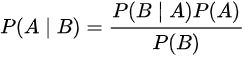
Where P(A|B) is the probabaility of occurrence of A knowing B already occurred and P(B|A) is the probability of occurrence of B knowing A occurred.

Scikit-learn Guide

There are mostly two types of Naive Bayes:

1. Gaussian Naive Bayes

2. Multinomial Naive Bayes.

Multinomial Naive Bayes
The method is used mostly for document classification. For example, classifying an article as sports article or say film magazine. It is also used for differentiating actual mails from spam mails. It uses the frequency of words used in different magazine to make a decision.

For example, the word "Dear" and "friends" are used a lot in actual mails and "offer" and "money" are used a lot in "Spam" mails. It calculates the prorbability of the occurrence of the words in case of actual mails and spam mails using the training examples. So, the probability of occurrence of "money" is much higher in case of spam mails and so on.

Now, we calculate the probability of a mail being a spam mail using the occurrence of words in it.

Gaussian Naive Bayes
When the predictors take up a continuous value and are not discrete, we assume that these values are sampled from a gaussian distribution.



 The term "naive" in "Naive Bayes" refers to the simplifying assumption made by the algorithm, which is that all features used to make a classification decision are independent of each other given the class label. This assumption is often called the "naive" assumption because, in the real world, it's rarely the case that features are completely independent.

In more technical terms, "naive" in "Naive Bayes" means that the algorithm assumes conditional independence between the features. This means that the probability of observing a particular combination of features for a given class is the product of the individual probabilities of each feature, given that class.

For example, if you have a spam email classification problem and you're using word frequencies as features, the Naive Bayes classifier would assume that the presence or absence of each word in an email is independent of the presence or absence of any other word, given that you know the email is spam or not spam. This is a strong and often unrealistic assumption because words in an email are not usually independent; they often depend on the context of the email.

Despite this simplifying assumption, Naive Bayes classifiers are known to perform surprisingly well in practice on a wide range of classification tasks, including spam detection, text classification, and more. This is because they are computationally efficient, require relatively small amounts of training data, and can provide good results when the independence assumption approximately holds or when the violation of independence doesn't have a significant impact on the classification accuracy.

In summary, the "naive" in "Naive Bayes" highlights the simplified and idealized assumption of feature independence, which is made to simplify the computation of conditional probabilities and make the algorithm tractable, even though it may not hold in reality.

# 1. Gaussian Naive Bayes

# Titanic - Machine Learning from Disaster
The competition is about using machine learning to create a model that predicts which passengers would have survived the Titanic shipwreck.

We will be using a dataset that includes passenger information like name, gender, age, etc.

In [ ]:
import pandas as pd


In [ ]:
# Mount Google Drive (if not already mounted)
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pwd


'/content/drive'

In [ ]:
cd drive

[Errno 2] No such file or directory: 'drive'
/content/drive


In [ ]:
ls

MyDrive/


In [ ]:
file_path = '/content/drive/MyDrive/titanic.csv'
df = pd.read_csv(file_path)

In [ ]:
df

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,"Montvila, Rev. Juozas",2,male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,"Graham, Miss. Margaret Edith",1,female,19.0,0,0,112053,30.0000,B42,S,1
888,889,"Johnston, Miss. Catherine Helen ""Carrie""",3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,"Behr, Mr. Karl Howell",1,male,26.0,0,0,111369,30.0000,C148,C,1


* survival: Survival
* pclass: Ticket class
* sex: Sex
* Age: Age in years
* sibsp: # of siblings / spouses aboard the Titanic
* parch: # of parents / children aboard the Titanic
* ticket: Ticket number
* fare: Passenger fare
* cabin: Cabin number
* embarked: Port of embarkation

In [ ]:
df= df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis=1)

In [ ]:
df

,Pclass,Sex,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0
...,...,...,...,...,...
886,2,male,27.0,13.0000,0
887,1,female,19.0,30.0000,1
888,3,female,NaN,23.4500,0
889,1,male,26.0,30.0000,1


In [ ]:
inputs=df.drop('Survived',axis='columns')

In [ ]:
target=df.Survived

In [ ]:
inputs

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500
...,...,...,...,...
886,2,male,27.0,13.0000
887,1,female,19.0,30.0000
888,3,female,NaN,23.4500
889,1,male,26.0,30.0000


In [ ]:
dummies=pd.get_dummies(inputs.Sex)

It is used for one-hot encoding categorical variables.

One-hot encoding is a technique used in machine learning to convert categorical data into a binary matrix (1s and 0s) so that it can be used in machine learning algorithms.

Each category is transformed into a new column, and a 1 or 0 is used to indicate the presence or absence of that category for each data point.

In [ ]:
dummies.head()

,female,male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True


In [ ]:
inputs=pd.concat([inputs,dummies],axis='columns')
inputs.head()

,Pclass,Sex,Age,Fare,female,male
0,3,male,22.0,7.2500,False,True
1,1,female,38.0,71.2833,True,False
2,3,female,26.0,7.9250,True,False
3,1,female,35.0,53.1000,True,False
4,3,male,35.0,8.0500,False,True


In [ ]:
inputs.drop(['Sex','male'],axis='columns',inplace=True)

In [ ]:
inputs.head(3)

,Pclass,Age,Fare,female
0,3,22.0,7.2500,False
1,1,38.0,71.2833,True
2,3,26.0,7.9250,True


In [ ]:
inputs.columns[inputs.isna().any()]

Index(['Age'], dtype='object')

inputs.isna().any() creates a Boolean Series where each element corresponds to a column and indicates whether that column contains at least one NaN value.

If a column has at least one NaN, the corresponding element in the Series is True; otherwise, it's False.

inputs.columns[inputs.isna().any()] then selects only the column names where the corresponding element in the Boolean Series is True, which means they have at least one NaN value.

In [ ]:
inputs.Age[:7]

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
5,NaN
6,54.0


In [ ]:
inputs.shape

(891, 4)

In [ ]:

# Filter and print rows with at least one NaN value
inputs[inputs.isna().any(axis=1)]

,Pclass,Age,Fare,female
5,3,NaN,8.4583,False
17,2,NaN,13.0000,False
19,3,NaN,7.2250,True
26,3,NaN,7.2250,False
28,3,NaN,7.8792,True
...,...,...,...,...
859,3,NaN,7.2292,False
863,3,NaN,69.5500,True
868,3,NaN,9.5000,False
878,3,NaN,7.8958,False


# Handling Missing Values?
Handling missing values is an essential step in the data preprocessing phase of a machine learning project. The way you deal with missing values can have a significant impact on the performance of your machine learning models. Here are some common strategies for handling missing values:

1. Remove Rows with Missing Values: One straightforward approach is to remove rows or samples that contain missing values. This is suitable when the amount of missing data is relatively small and removing those rows doesn't significantly impact the dataset's representativeness.

## df.dropna(inplace=True)

2. Fill with a Default Value: You can fill missing values with a default value, such as 0 or the mean/median of the column. This is suitable for numerical data.

## df['column_name'].fillna(0, inplace=True)

3. For the mean/median approach:
## mean_value = df['column_name'].mean()
## df['column_name'].fillna(mean_value, inplace=True)

4. Forward Fill or Backward Fill: When dealing with time series data or sequential data, you can use forward fill (ffill) or backward fill (bfill) to propagate the previous or next valid value respectively.

## df.fillna(method='ffill', inplace=True)

5. Interpolation: Interpolation methods can be used to estimate missing values based on existing data points. This is useful for time series data or datasets with a natural order.

## df['column_name'].interpolate(method='linear', inplace=True)

6. Impute with Machine Learning Models: You can use machine learning models to predict missing values based on other features in the dataset. This approach can be powerful when dealing with complex datasets.

## from sklearn.impute import KNNImputer
## imputer = KNNImputer(n_neighbors=2)
## df['column_name'] = imputer.fit_transform(df[['column_name']])



In [ ]:
inputs.Age=inputs.Age.fillna(inputs.Age.mean())

In [ ]:
inputs.Age[:7]

,Age
0,22.000000
1,38.000000
2,26.000000
3,35.000000
4,35.000000
5,29.699118
6,54.000000


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train, y_test = train_test_split(inputs,target,test_size=0.3, random_state=42)

In [ ]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()

In [ ]:
#training the model
model.fit(X_train,y_train)

GaussianNB()

In [ ]:
model.score(X_test,y_test)

0.7761194029850746

In [ ]:
X_test[:10]

,Pclass,Age,Fare,female
709,3,29.699118,15.2458,False
439,2,31.000000,10.5000,False
840,3,20.000000,7.9250,False
720,2,6.000000,33.0000,True
39,3,14.000000,11.2417,True
290,1,26.000000,78.8500,True
300,3,29.699118,7.7500,True
333,3,16.000000,18.0000,False
208,3,16.000000,7.7500,True
136,1,19.000000,26.2833,True


In [ ]:
y_test[:10]

,Survived
709,1
439,0
840,0
720,1
39,1
290,1
300,1
333,0
208,1
136,1


In [ ]:
model.predict(X_test[0:10])

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1])

In [ ]:
model.predict_proba(X_test[:10])

array([[0.96936275, 0.03063725],
       [0.93717177, 0.06282823],
       [0.96222728, 0.03777272],
       [0.15327261, 0.84672739],
       [0.3768726 , 0.6231274 ],
       [0.02067746, 0.97932254],
       [0.46303706, 0.53696294],
       [0.95888508, 0.04111492],
       [0.38848423, 0.61151577],
       [0.08683721, 0.91316279]])

## 'predict_proba' returns the probability estimates for each class label (0 and 1) for the input data point.

This method is particularly useful when you need not only the predicted class but also **the level of confidence **or uncertainty associated with that prediction, which can be valuable in various applications, including binary and multiclass classification tasks.

## Model Evaluation


In [ ]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
)

y_pred = model.predict(X_test)
accuray = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuray)
print("F1 Score:", f1)

Accuracy: 0.7761194029850746
F1 Score: 0.7758375020501885


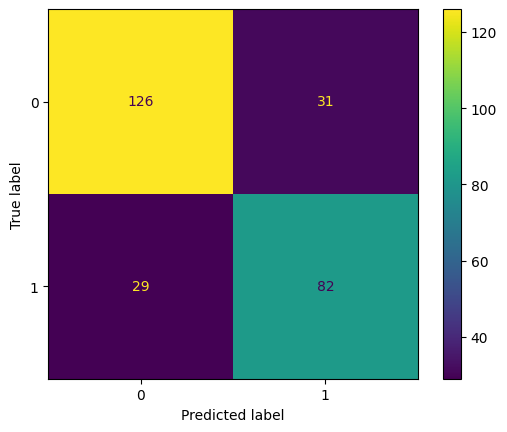

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot();

## Example:  Applying Gaussian Naive Bayes (GaussianNB) to the Iris dataset

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']
Shape of feature data: (150, 4)
Shape of target labels: (150,)
Training data size: 120
Testing data size: 30
Accuracy: 100.00%
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



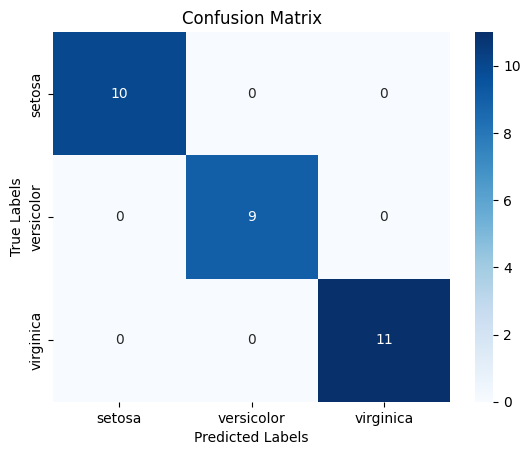

In [ ]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Iris dataset
data = load_iris()

# Extract features (X) and target labels (y)
X = data.data
y = data.target

# Print basic information about the dataset
print("Feature names:", data.feature_names)
print("Target names:", data.target_names)
print("Shape of feature data:", X.shape)
print("Shape of target labels:", y.shape)

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data size: {X_train.shape[0]}")
print(f"Testing data size: {X_test.shape[0]}")

# Initialize the Gaussian Naive Bayes model
gnb = GaussianNB()

# Train the model on the training data
gnb.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gnb.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification report (precision, recall, f1-score)
class_report = classification_report(y_test, y_pred, target_names=data.target_names)
print("Classification Report:")
print(class_report)

# Visualize the confusion matrix using seaborn heatmap
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


# Class Exercise:
## Use GaussianNB with the Digits dataset dataset and follow the same steps to classify handwritten digits.

In [ ]:
from sklearn.datasets import load_digits

# Load Digits dataset
digits = load_digits()
X = digits.data
y = digits.target

# Split, train, and evaluate as you did with the Iris dataset


# 2. Multinomial Naive Bayes

In the code we did spam detection for given set of messages and evaluated model accuracy for the output it gave.

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

data = {
    'text': [
        'Free money now',
        'Call now to claim your prize',
        'Meet me at the park',
        'Let’s catch up later',
        'Win a new car today!',
        'Lunch plans?',
        'Congratulations! You won a lottery',
        'Can you send me the report?',
        'Exclusive offer for you',
        'Are you coming to the meeting?'
    ],
    'label': ['spam', 'spam', 'not spam', 'not spam', 'spam', 'not spam', 'spam', 'not spam', 'spam', 'not spam']
}

df = pd.DataFrame(data)

df['label'] = df['label'].map({'spam': 1, 'not spam': 0})

X = df['text']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

vectorizer = CountVectorizer()
X_train_vectors = vectorizer.fit_transform(X_train)
X_test_vectors = vectorizer.transform(X_test)

model = MultinomialNB()
model.fit(X_train_vectors, y_train)

y_pred = model.predict(X_test_vectors)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%\n")

custom_message = ["Congratulations, you've won a free vacation"]
custom_vector = vectorizer.transform(custom_message)
prediction = model.predict(custom_vector)
print("Prediction for custom message:", "Spam" if prediction[0] == 1 else "Not Spam")


Accuracy: 66.67%

Prediction for custom message: Spam


## CountVectorizer

is a feature extraction technique from the scikit-learn library that converts a collection of text documents into a matrix of token counts.

It counts the frequency of words (or tokens) in each document in a corpus and returns a sparse matrix, where each row corresponds to a document, and each column corresponds to a unique word from the entire corpus.

## How CountVectorizer Works:
1. Tokenization: It splits the text into individual words or tokens.
2. Vocabulary Building: It builds a vocabulary of all the unique words (tokens) found across the entire corpus of documents.
3. Frequency Counting: It counts how many times each word appears in each document.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Example text data
X_train = ["This is a sample.", "This is another example.", "Text mining is fun!"]

# Initialize CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the data
X_train_vectors = vectorizer.fit_transform(X_train)

# View the shape of the resulting matrix
print("Shape of the feature matrix:", X_train_vectors.shape)

# Convert the sparse matrix to a dense format (optional, for visualization)
dense_matrix = X_train_vectors.toarray()

# Print the dense matrix
print(dense_matrix)

# Get the feature names (words) corresponding to the columns
feature_names = vectorizer.get_feature_names_out()
print("Feature names:", feature_names)


Shape of the feature matrix: (3, 8)
[[0 0 0 1 0 1 0 1]
 [1 1 0 1 0 0 0 1]
 [0 0 1 1 1 0 1 0]]
Feature names: ['another' 'example' 'fun' 'is' 'mining' 'sample' 'text' 'this']


## Key Takeaways:
CountVectorizer transforms a collection of text documents into a matrix of token counts.
Each column corresponds to a word (or token) in the vocabulary, and the matrix entries show the frequency of each word in each document.
You can use it with different parameters to control tokenization, stop word removal, n-gram extraction, and feature selection.

## Applications of Multinomial Naive Bayes
Multinomial Naive Bayes is widely used in tasks where data involves counts or frequencies. Here are some common applications of it :

1. Spam Email Detection: It can be used to identify whether an email is spam or not by looking at the frequency of certain words like "free" and "offer" in the message.
2. Sentiment Analysis: This is used to determine if a piece of text like a review or a tweet is a positive or negative sentiment.
3. Document Classification: It can sort documents into different categories like classifying news articles into topics such as sports, politics or entertainment.
4. Language Detection: It can be used to identify the language of a document based on the frequency of words typical to each language.
Topic Modeling: In large collections of text it helps in grouping similar documents based on the frequency of keywords related to different topics.




Class Exercise: Your objective is to load any multi-class classification dataset from kaggle and perform classification using naive bayes classifier.

# https://www.kaggle.com/code/shivadumnawar/titanic-a-complete-tutorial-for-beginners/notebook

# https://www.kaggle.com/code/sashr07/kaggle-titanic-tutorial